# Image Preprocess Testing

In [7]:
import boto3
s3_resource = boto3.resource('s3')
client=boto3.client('rekognition')

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import imageio
from PIL import Image
from PIL import ImageFilter

IMAGE 1

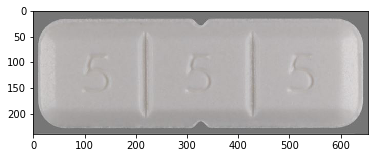

In [9]:
pic_img4a = imageio.imread('./test_images/img4a.JPG')
pic_img4b = imageio.imread('./test_images/img4b.JPG')
plt.imshow(pic_img4a);

## `Pillow` Filters

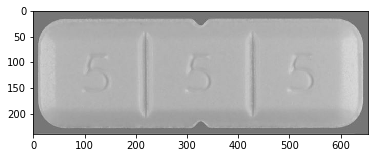

In [10]:
pic_img4a_bw = Image.open('./test_images/img4a.JPG').convert('L')
plt.imshow(pic_img4a_bw);

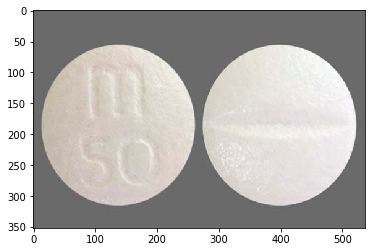

In [11]:
pic_m50 = Image.open('./test_images/m50_pill.JPG')
plt.imshow(pic_m50);

Grayscaling

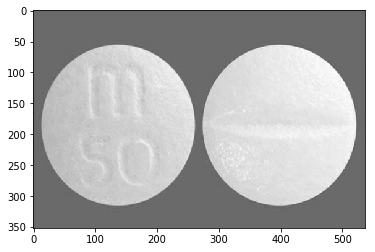

In [12]:
# https://pythontic.com/image-processing/pillow/

img_gray = Image.open('./test_images/m50_pill.JPG').convert('L')
img_gray.save("./test_images/m50_gray.JPG")
plt.imshow(img_gray);

Black & White

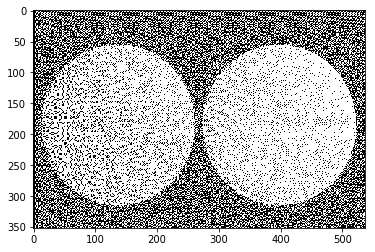

In [13]:
img_bw = Image.open('./test_images/m50_pill.JPG').convert('1')
img_bw.save("./test_images/m50_bw.JPG")
plt.imshow(img_bw);

Edge Detection

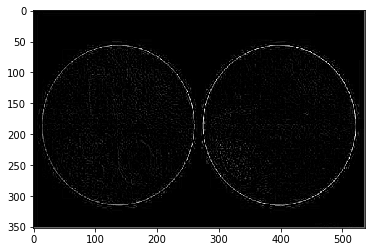

In [22]:
imageWithEdges = img_gray.filter(ImageFilter.FIND_EDGES)
plt.imshow(imageWithEdges);

Another Edge Detection

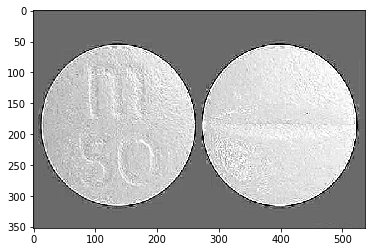

In [23]:
edgeEnahnced = img_gray.filter(ImageFilter.EDGE_ENHANCE_MORE)
plt.imshow(edgeEnahnced);

Image Emboss

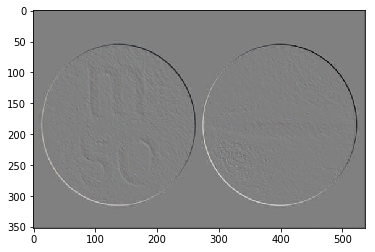

In [25]:
imageEmboss = pic_m50.filter(ImageFilter.EMBOSS)
plt.imshow(imageEmboss);

Convert Using Color Pelette

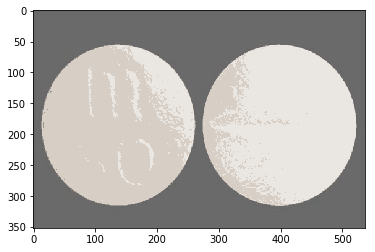

In [26]:
imageWithColorPalette = pic_m50.convert("P", palette=Image.ADAPTIVE, colors=8)
plt.imshow(imageWithColorPalette);

Treshholding

In [27]:
multiBands = pic_m50.split()
multiBands

(<PIL.Image.Image image mode=L size=537x352 at 0x1AED9F70630>,
 <PIL.Image.Image image mode=L size=537x352 at 0x1AED9F70BA8>,
 <PIL.Image.Image image mode=L size=537x352 at 0x1AED9DB9320>)

In [28]:
# Method to process the red band
def pixelProcRed(intensity):
    return 0

# Method to process the blue band
def pixelProcBlue(intensity):
    return intensity

# Method to process the green band
def pixelProcGreen(intensity):
    return 0

redBand = multiBands[0].point(pixelProcRed)
greenBand = multiBands[1].point(pixelProcGreen)
blueBand = multiBands[2].point(pixelProcBlue)

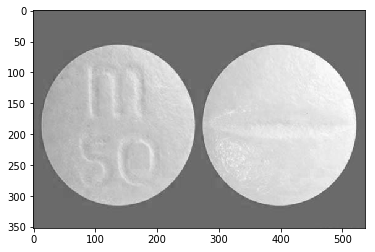

In [29]:
plt.imshow(blueBand);

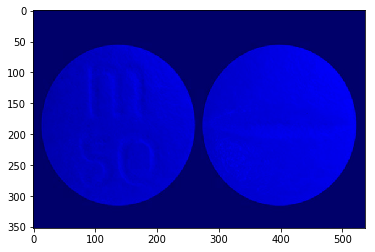

In [30]:
newImage = Image.merge("RGB", (redBand, greenBand, blueBand))
plt.imshow(newImage);

## `CV2` Filters

Gaussian Blur

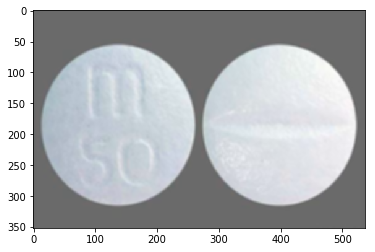

In [31]:
# https://www.programcreek.com/python/example/86807/cv2.GaussianBlur
# https://www.tutorialkart.com/opencv/python/image-edge-detection/
# https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/

import cv2
import numpy
# read image
src = cv2.imread('./test_images/m50_pill.JPG', cv2.IMREAD_UNCHANGED)
 
# apply guassian blur on src image
dst = cv2.GaussianBlur(src,(5,5),cv2.BORDER_DEFAULT)
plt.imshow(dst);

In [32]:
# cv2.imwrite('./test_images/m50_gaus.JPG', dst)

Gaussian Blur + Canny + Gaussian Blur

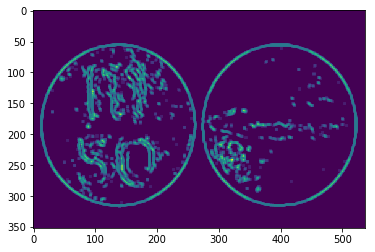

In [33]:
img_canny = cv2.Canny(dst, 22, 22)
dst2 = cv2.GaussianBlur(img_canny,(5,5),cv2.BORDER_DEFAULT)
# img_canny2 = cv2.Canny(dst2, 40, 40)
plt.imshow(dst2);

In [34]:
# cv2.imwrite('./test_images/m50_canny.JPG', dst2)

High Contrast

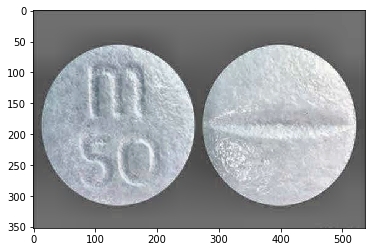

In [35]:
# https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv

#-----Reading the image-----------------------------------------------------
img = cv2.imread('./test_images/m50_pill.JPG', 1)

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.imshow(cl);

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
plt.imshow(limg);

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.imshow(final);

In [36]:
# cv2.imwrite('./test_images/m50_contrast.JPG', final)

Contrast + Gaussian Blur

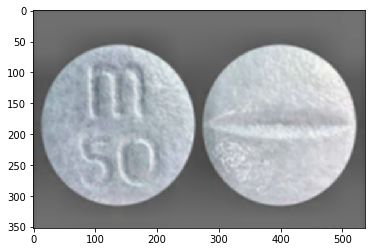

In [37]:
final_blured = cv2.GaussianBlur(final,(5,5),cv2.BORDER_DEFAULT)
plt.imshow(final_blured);

In [38]:
# cv2.imwrite('./test_images/m50_blurcont.JPG', final)

Contrast + Canny + Gaussian Blur

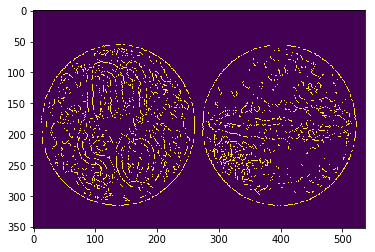

In [39]:
final_blur = cv2.GaussianBlur(final,(9,9),cv2.BORDER_DEFAULT)
final_canny = cv2.Canny(final_blur, 20, 20)
plt.imshow(final_canny);

Rotating Image with PILLow

In [44]:
# Using Contrasted image ('final')
rotated  = final.rotate(180)
plt.imshow(rotated);

AttributeError: 'numpy.ndarray' object has no attribute 'rotate'

Rotating Image with CV2

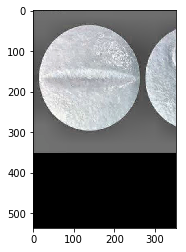

In [43]:
# get image height, width
(h, w) = final.shape[:2]

# calculate the center of the image
center = (w / 2, h / 2)
 
angle90 = 90
angle180 = 180
angle270 = 270
 
scale = 1.0
 
# Perform the counter clockwise rotation holding at the center
# 90 degrees
M = cv2.getRotationMatrix2D(center, angle180, scale)
rotated90 = cv2.warpAffine(final, M, (h, w))

plt.imshow(rotated90);

#### Detecting text from local image

In [ ]:
imageFile='./test_images/img1a.JPG'

with open(imageFile, 'rb') as image:
    response = client.detect_text(Image={'Bytes': image.read()})
        
print('Detected labels in ' + imageFile)    
for text in response['TextDetections']:
    print (text['DetectedText'] + ' : ' + str(text['Confidence']))


# textDetections=response['TextDetections']
# print ('Detected text')
# for text in textDetections:
#     print ('Detected text:' + text['DetectedText'])
#     print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
#     print('\n')
    # print ('Id: {}'.format(text['Id']))

#### Detecting text from ulr image

In [ ]:
import urllib.request
...
# Download the file from `url` and save it locally under `file_name`:
urllib.request.urlretrieve("http://www.gunnerkrigg.com//comics/00000001.jpg", "00000001.jpg")
imageFile='./00000001.jpg'

with open(imageFile, 'rb') as image:
    response = client.detect_text(Image={'Bytes': image.read()})
        
print('Detected labels in ' + imageFile)    
for text in response['TextDetections']:
    print (text['DetectedText'] + ' : ' + str(text['Confidence']))
